**All tests**

In [1]:
from imports import *
from sklearn import datasets
from classes import NeuralNetwork
#from functions import mse, cross_entropy, mse_der, sigmoid, sigmoid_der, reLU, ReLU_der, identity, identity_der, accuracy, cross_entropy, polynomial_features
from functions import *
from autograd import grad
import classes
import functions
import importlib
from sklearn.model_selection import train_test_split

importlib.reload(classes) 
importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Jogga\\Documents\\H25\\FYS-STK4155\\FYS-STK4155_coursework\\Project-2\\functions.py'>

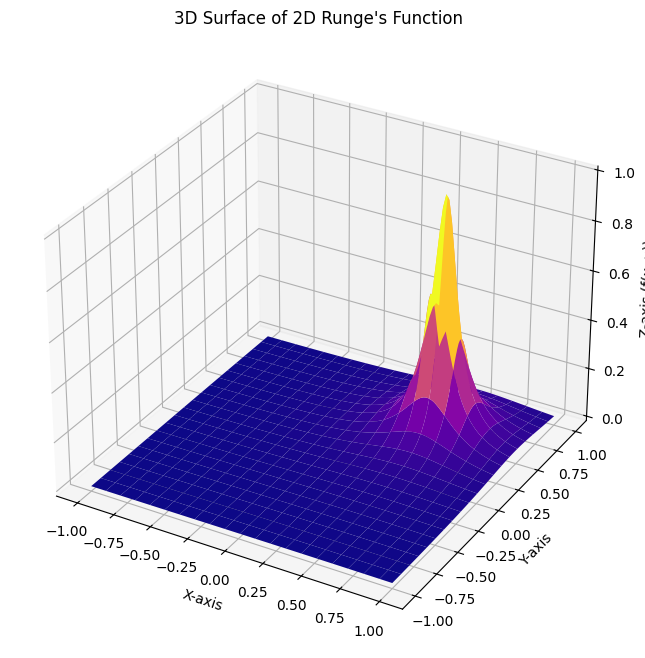

In [2]:
def runge2d(x,y):
    return 1 / ((10*x-5)**2 + (10*y-5)**2 + 1)


def plot_runge2d():
    n=100
    x = np.linspace(-1, 1, n)
    y = np.linspace(-1, 1, n)
    X, Y = np.meshgrid(x, y)
    Z = runge2d(X, Y)


    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, Z, cmap='plasma', rstride=5, cstride=5) 
    ax.set_title("3D Surface of 2D Runge's Function")
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis (f(x, y))')

plot_runge2d()

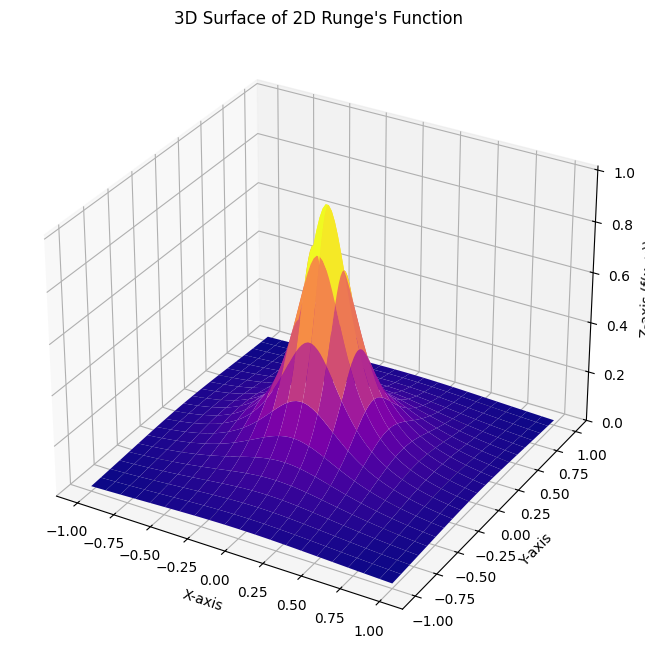

In [3]:
# 2nd plotting attempt, trying to center at (0,0)

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

# 2. Create the Grid
# meshgrid creates coordinate matrices from coordinate vectors
X, Y = np.meshgrid(x, y)

def runge_2d(X, Y):
    """2D Runge's Function: z = 1 / (1 + 25 * (x^2 + y^2))"""
    return 1.0 / (1.0 + 25.0 * (X**2 + Y**2))

Z = runge_2d(X, Y) 


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='plasma', rstride=5, cstride=5) 

ax.set_title("3D Surface of 2D Runge's Function")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis (f(x, y))')

plt.show()

Test for classification

c:\Users\Jogga\Documents\H25\FYS-STK4155\FYS-STK4155_coursework\Project-2\functions.py:173: RuntimeWarning: divide by zero encountered in divide
  return -(target/predict)
c:\Users\Jogga\Documents\H25\FYS-STK4155\FYS-STK4155_coursework\Project-2\classes.py:65: RuntimeWarning: invalid value encountered in matmul
  dC_da = np.matmul(delta, W.T)
c:\Users\Jogga\Documents\H25\FYS-STK4155\FYS-STK4155_coursework\Project-2\classes.py:66: RuntimeWarning: invalid value encountered in multiply
  delta = dC_da * self.act_der[i-1](zs[i-1])
c:\Users\Jogga\Documents\H25\FYS-STK4155\FYS-STK4155_coursework\Project-2\functions.py:169: RuntimeWarning: divide by zero encountered in log
  return np.sum(-target * np.log(predict))


0.3333333333333333


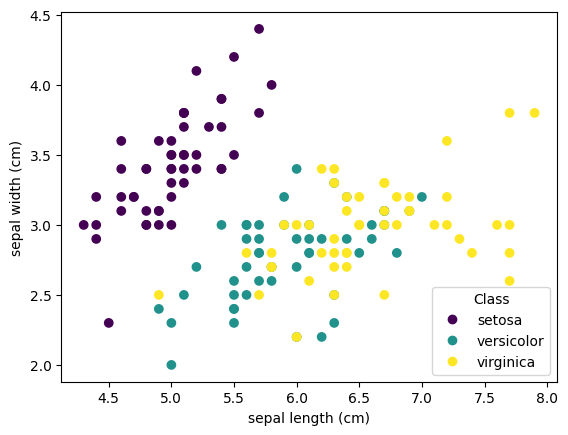

In [ ]:
np.random.seed(51)
iris = datasets.load_iris()
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Class")

inputs = iris.data
# Since each prediction is a vector with a score for each of the three types of flo
# we need to make each target a vector with a 1 for the correct flower and a 0 for
k = len(inputs)
targets = np.zeros((len(iris.data), 4))
for i, t in enumerate(iris.target):
    targets[i, t] = 1
Classifier = NeuralNetwork(4, [8,4], [sigmoid, softmax_vec], [ReLU_der, sigmoid_der], cross_entropy, cross_entropy_der)


weights = Classifier.train_SGD(inputs, targets, n_epochs=1000)
predictions = Classifier.feed_forward(inputs)
print(accuracy(predictions, targets))


# --- 2D Runge Plot ---
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# ax.plot_surface(X, Y, predictions, cmap='plasma', rstride=5, cstride=5) 

# ax.set_title("Predictions vs 2D Runge")
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_zlabel('Z-axis (f(x, y))')




Testing for linear regression

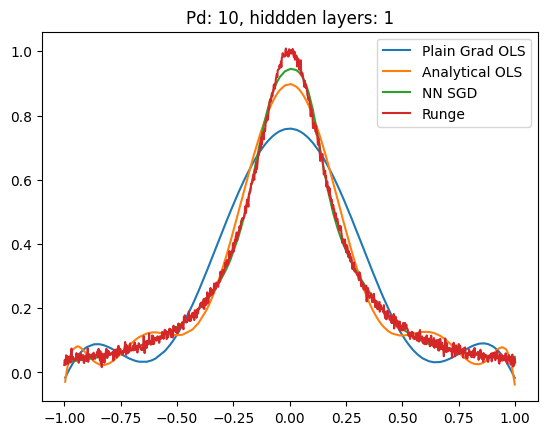

In [ ]:
from classes import *

np.random.seed(50)

n = 1000
x = np.linspace(-1, 1, n).reshape(-1, 1)
y = 1/(1 + 25 * x**2) +  np.random.normal(0, 0.01, x.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(x_train.reshape(-1,1))
Y_train = scaler_y.fit_transform(y_train.reshape(-1,1))

X_test = scaler_X.transform(x_test.reshape(-1,1))
Y_test = scaler_y.transform(y_test.reshape(-1,1))

LinReg = NeuralNetwork(1, [50,1], [sigmoid, sigmoid], [sigmoid_der, sigmoid_der], mse, mse_der)
LinReg.train_SGD(X_train, y_train, eta=0.2, n_epochs=5000)
y_pred = LinReg.feed_forward(X_test)

np.random.seed(50)
x = np.linspace(-1, 1, n)
y = 1/(1 + 25 * x**2) +  np.random.normal(0, 0.01, n)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

n = 10
X = polynomial_features(x_train, n)
Y = polynomial_features(x_test, n)


scaler = StandardScaler(with_mean=True, with_std=True)
Xtr_s = scaler.fit_transform(X)
Xte_s = scaler.transform(Y)   

y_mean = np.mean(y_train)
y_centered = y_train - y_mean
g = GradientDescent(Xtr_s,5000, y_train, eps=1e-5, l1=False)
ols_betas = g.gradOrd(5000, eta=0.2)
pred_ = Xte_s@ols_betas + y_mean
analytical_betas = ols(Xtr_s, y_train)
predOls = Xte_s@analytical_betas + y_mean

sort_indices = np.argsort(x_test.flatten())


plt.plot(x_test[sort_indices], pred_[sort_indices], label="Plain Grad OLS")
plt.plot(x_test[sort_indices], predOls[sort_indices], label="Analytical OLS")
plt.plot(x_test[sort_indices],y_pred[sort_indices], label="NN SGD")
plt.title("Pd: 10, hiddden layers: 1")
plt.plot(x,y, label="Runge")
plt.legend()


Comparing MSE scores

In [48]:
print("MSE for Plain gradient OLS:", round(mse(pred_, y_test), 4))
print("MSE for analytical OLS:", round(mse(predOls, y_test), 4))
print("MSE for OLS using Neural Net:", round(mse(y_pred.flatten(), y_test), 4))

MSE for Plain gradient OLS: 0.0076
MSE for analytical OLS: 0.0017
MSE for OLS using Neural Net: 0.0002


Comparing analytical OLS and OLS from gradient descent with Neural Net with two layers using 50 and 100 nodes respectively

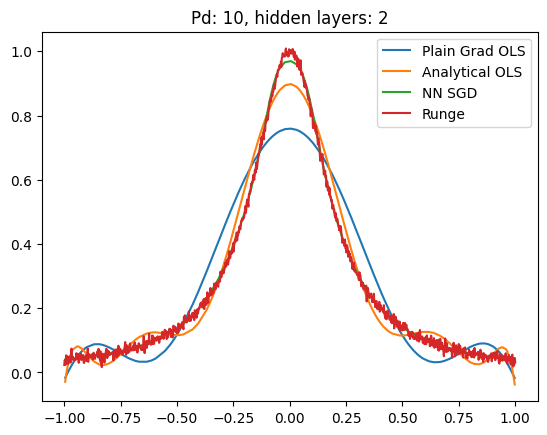

In [ ]:
np.random.seed(50)

n = 1000
x = np.linspace(-1, 1, n).reshape(-1, 1)
y = 1/(1 + 25 * x**2) +  np.random.normal(0, 0.01, x.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(x_train.reshape(-1,1))
Y_train = scaler_y.fit_transform(y_train.reshape(-1,1))

X_test = scaler_X.transform(x_test.reshape(-1,1))
Y_test = scaler_y.transform(y_test.reshape(-1,1))

LinReg = NeuralNetwork(1, [50,100, 1], [sigmoid, sigmoid, sigmoid], [sigmoid_der, sigmoid_der, sigmoid_der], mse, mse_der)
LinReg.train_SGD(X_train, y_train, eta=0.2, n_epochs=5000)
y_pred = LinReg.feed_forward(X_test)

np.random.seed(50)
x = np.linspace(-1, 1, n)
y = 1/(1 + 25 * x**2) +  np.random.normal(0, 0.01, n)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

n = 10
X = polynomial_features(x_train, n)
Y = polynomial_features(x_test, n)


scaler = StandardScaler(with_mean=True, with_std=True)
Xtr_s = scaler.fit_transform(X)
Xte_s = scaler.transform(Y)   

y_mean = np.mean(y_train)
y_centered = y_train - y_mean
g = GradientDescent(Xtr_s,5000, y_train, eps=1e-5, l1=False)
ols_betas = g.gradOrd(5000, eta=0.2)
pred_ = Xte_s@ols_betas + y_mean
analytical_betas = ols(Xtr_s, y_train)
predOls = Xte_s@analytical_betas + y_mean

sort_indices = np.argsort(x_test.flatten())

plt.plot(x_test[sort_indices], pred_[sort_indices], label="Plain Grad OLS")
plt.plot(x_test[sort_indices], predOls[sort_indices], label="Analytical OLS")
plt.plot(x_test[sort_indices],y_pred[sort_indices], label="NN SGD")
plt.title("Pd: 10, hidden layers: 2")
plt.plot(x,y, label="Runge")
plt.legend()

Calculating and comparing MSE values

In [41]:
print("MSE for Plain gradient OLS:", round(mse(pred_, y_test), 4))
print("MSE for analytical OLS:", round(mse(predOls, y_test), 4))
print("MSE for OLS using Neural Net:", round(mse(y_pred.flatten(), y_test), 4))

MSE for Plain gradient OLS: 0.0076
MSE for analytical OLS: 0.0017
MSE for OLS using Neural Net: 0.0001


Testing for 2D Runge

[0.03846154 0.03999984 0.04163092 0.04336227 0.04520214 0.04715964
 0.04924482 0.05146881 0.05384396 0.05638397]


Text(0.5, 0, 'Z-axis (f(x, y))')

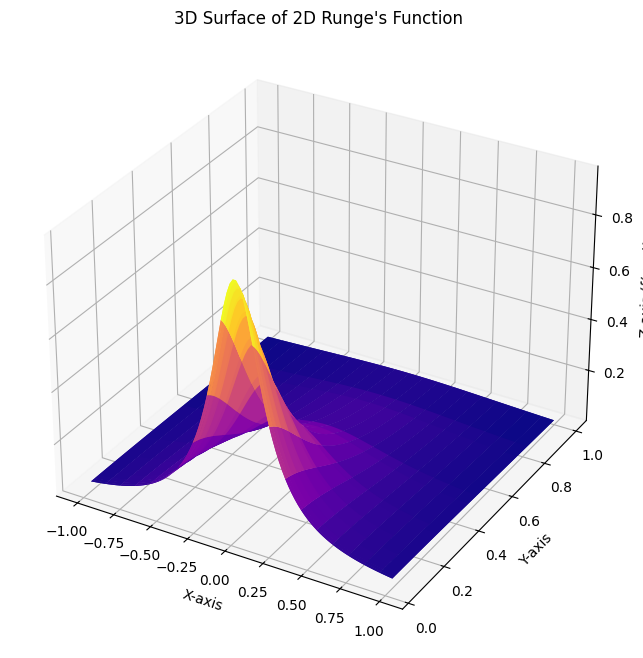

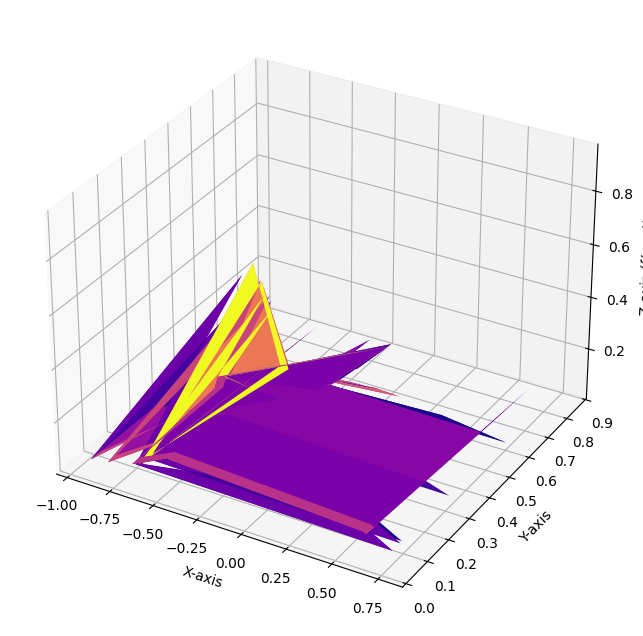

In [ ]:
np.random.seed(50)

n = 100
x = np.linspace(-1, 1, n).reshape(-1, 1)
y = 1/(1 + 25 * x**2) +  np.random.normal(0, 0.01, x.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(x_train.reshape(-1,1))
Y_train = scaler_y.fit_transform(y_train.reshape(-1,1))

X_test = scaler_X.transform(x_test.reshape(-1,1))
Y_test = scaler_y.transform(y_test.reshape(-1,1))

LinReg = NeuralNetwork(1, [50,1], [sigmoid, sigmoid], [sigmoid_der, sigmoid_der], mse, mse_der)
LinReg.train_SGD(X_train, y_train, eta=0.2, n_epochs=5000)
y_pred = LinReg.feed_forward(X_test)

np.random.seed(50)
x = np.linspace(-1, 1, n)
y = 1/(1 + 25 * x**2) + np.random.normal(0, 0.01, n)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)


n = 10
X = polynomial_features(x_train, n)
Y = polynomial_features(x_test, n)


scaler = StandardScaler(with_mean=True, with_std=True)
Xtr_s = scaler.fit_transform(X)
Xte_s = scaler.transform(Y)   

y_mean = np.mean(y_train)
y_centered = y_train - y_mean
g = GradientDescent(Xtr_s,5000, y_train, eps=1e-5, l1=False)
ols_betas = g.gradOrd(5000, eta=0.2)
pred_ = Xte_s@ols_betas + y_mean
analytical_betas = ols(Xtr_s, y_train)
predOls = Xte_s@analytical_betas + y_mean

sort_indices = np.argsort(x_test.flatten())

X, Y = np.meshgrid(x, y)

def runge_2d(X, Y):
    """2D Runge's Function: z = 1 / (1 + 25 * (x^2 + y^2))"""
    return 1.0 / (1.0 + 25.0 * (X**2 + Y**2))

Z = runge_2d(X, Y) 


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='plasma', rstride=5, cstride=5) 

ax.set_title("3D Surface of 2D Runge's Function")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis (f(x, y))')

X, Y = np.meshgrid(x_test, y_pred)

def runge_2d(X, Y):
    """2D Runge's Function: z = 1 / (1 + 25 * (x^2 + y^2))"""
    return 1.0 / (1.0 + 25.0 * (X**2 + Y**2))

Z = runge_2d(X, Y) 


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='plasma', rstride=5, cstride=5) 

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis (f(x, y))')
